# CAP - Cumulative Accuracy Profile

links:
+ https://www.geeksforgeeks.org/python-cap-cumulative-accuracy-profile-analysis/
+ https://en.wikipedia.org/wiki/Cumulative_accuracy_profile
+ https://medium.com/@lotass/classification-models-performance-evaluation-c3a91562793

## O que é CAP

<img src='../../tree/imgs/img-roc-auc-cap-05.jpg' width=600px>

Popularmente chamado de Cumulatie Accuracy Profile (CAP) ou, em contexto de marketing Cumulative Gain Curve ou somente Gain Curve é um gráfico usado para avaliar modelos de classificação.

O CAP de um modelo representa o número cumulativo de resultados positivos ao longo do eixo y  (o seja, a classificação correta do modelo para amabas as classes)versus o número cumulativo correspondente de feaures, o eixo x.

### Diferença entre ROC e CAP


O CAP é distinto da característica de operação do receptor (ROC), que representa a taxa de verdadeiro positivo em relação à taxa de falso positivo.

### Significado da plotagem do CAP de `Random Model`

O `random plot` é feito sob a suposição de que plotamos o número total de pontos que variam de 0 ao número total de pontos de dados no conjunto de dados. O eixo y foi mantido como o número total de pontos para os quais a variável dependente do nosso conjunto de dados tem o resultado como 1. O gráfico aleatório pode ser entendido como um relacionamento que aumenta linearmente. 

Um exemplo é um modelo que prevê se um produto é comprado (resultado positivo) por cada indivíduo de um grupo de pessoas (parâmetro de classificação) com base em fatores como sexo, idade, renda etc. Se os membros do grupo forem contatados aleatoriamente, o número acumulado de produtos vendidos aumentaria linearmente em direção a um valor máximo correspondente ao número total de compradores dentro do grupo. 

Essa distribuição é chamada de `random CAP`.

### Significado da plotagem do CAP de `Perfect Model`

Em seguida, traçamos o `perfect plot` (ou a linha ideal). 

Uma previsão perfeita determina exatamente quais membros do grupo comprarão o produto, de modo que o número máximo de produtos vendidos seja alcançado com um número mínimo de chamadas. 

Isso produz uma linha íngreme na curva CAP que permanece plana quando o máximo é atingido (entrar em contato com todos os outros membros do grupo não levará a mais produtos vendidos), que é o CAP “perfeito”.

Um modelo perfeito encontra resultados positivos no mesmo número de tentativas que o número de resultados positivos

### Final Analysis

#### Content 1

In any case, our classifier algorithm should not produce a line that lies under the random line. It is considered to be a really bad model in that case. Since the plotted classifier line is close to the ideal line we can say that our model is a really good fit. Take the area under the perfect plot and call it aP. Take the area under the prediction model and call it aR. Then take the ratio as aR/aP. This ratio is called the Accuracy Rate. The closer is the value to 1, the better the model. This is one way to analyse it.

Another way to analyse it would be to project a line from about 50% from the axis on the prediction model and project it on the y-axis. Let us say that we obtain the projection value as X%.

Outra maneira de analisar isso seria projetar uma linha a cerca de 50% do eixo no modelo de previsão e projetá-la no eixo y. Digamos que obtemos o valor da projeção em X%.

----

##### Analisãndo pelo Cálculo (nâo usado)
Pegue a área sob a trama perfeita e chame-a de AP. Pegue a área sob o modelo de previsão e chame-a de AR. Então tome a proporção como aR / aP. Essa proporção é chamada de taxa de precisão. Quanto mais próximo o valor de 1, melhor o modelo. Esta é uma maneira de analisá-lo.

> The CAP can be used to evaluate a model by comparing the curve to the perfect CAP in which the maximum number of positive outcomes is achieved directly and to the random CAP in which the positive outcomes are distributed equally. A good model will have a CAP between the perfect CAP and the random CAP with a better model tending to the perfect CAP.
The accuracy ratio (AR) is defined as the ratio of the area between the model CAP and the random CAP and the area between the perfect CAP and the random CAP.[1] For a successful model the AR has values between zero and one, with a higher value for a stronger model.


#### Analisando pelo ponto de 50% no CAP (mais usado)

Outra maneira de analisar isso seria projetar uma linha a cerca de 50% do eixo no modelo de previsão e projetá-la no eixo y. Digamos que obtemos o valor da projeção em X%.

````
-> 60%        : it is a really bad model
-> 60%<X<70%  : it is still a bad model but better than the first case obviously
-> 70%<X<80%  : it is a good model
-> 80%<X<90%  : it is a very good model
-> 90%<X<100% : it is extraordinarily good and might be one of the overfitting cases.
So according to this analysis, we can determine how accurate our model is.
````

> Another indication of the model strength is given by the cumulative number of positive outcomes at 50% of the classifying parameter. For a successful model this value should lie between 50% and 100% of the maximum, with a higher percentage for stronger models.

<img src='../../tree/imgs/img-roc-auc-cap-06.png' width=600px>





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
file_path = "../files/"

## PréProcessamento

### Base de dados de crédito

Base com registro de 2.000 cliente contendo idade, renda e empréstimo.

O desafio é: Dado essas features prever se será capaz ou não de pagar o empréstimo.

+ `clientid`: Um ID para o cliente
    - Variável Categórica Nominal
+ `income`: Salário/Renda da pessoa no formato Anual
    - Variável Numérica Contínua
+ `age`: Idade da pessoa
    - Variável Numérica Contínua ou pode ser convertida para Discreta
+ `loan`: Quantidade de empréstimo realizado
    - Variável Numérica Contínua Classe a ser Prevista
+ `default`: (classe)
    - 0: Não foi capaz de pagar o empréstimo
    - 1: Foi capas de pagar

In [3]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# Colocando a média
base.loc[base.age < 0, 'age'] = 40.92
    
# Dividindo as features das classes
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

# Atribuindo a média aos valores NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

# Escalonamento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Divisão de 75% da base para treino, e 25% para teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

### Classificadores e seus respsctivos terinamentos

In [5]:
from sklearn.metrics import accuracy_score

# Classificador NaiveBaye
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train, y_train)
predicts = model_naive_bayes.predict(x_test)
print("NaiveBayes", accuracy_score(y_test, predicts))

# Classificador Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(x_train, y_train)
predicts = model_decision_tree.predict(x_test)
print("DecisionTree", accuracy_score(y_test, predicts))

# Classificador Regressão Logística
from sklearn.linear_model import LogisticRegression
model_logistc_regression = LogisticRegression()
model_logistc_regression.fit(x_train, y_train)
predicts = model_logistc_regression.predict(x_test)
print("LogisticRegression", accuracy_score(y_test, predicts))

# Classificador SVM
from sklearn.svm import SVC
model_svm = SVC(kernel = 'rbf', random_state = 1, C = 2.0, probability=True)
model_svm.fit(x_train, y_train)
predicts = model_svm.predict(x_test)
print("SVM", accuracy_score(y_test, predicts))

# Classificador KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
model_knn.fit(x_train, y_train)
predicts = model_knn.predict(x_test)
print("KNN", accuracy_score(y_test, predicts))

# Classificador Floresta Randômica
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
model_random_forest.fit(x_train, y_train)
predicts = model_random_forest.predict(x_test)
print("RandomForest", accuracy_score(y_test, predicts))

# Classificador Redes Neurais Múltiplas camadas
from sklearn.neural_network import MLPClassifier
model_neural_net = MLPClassifier( max_iter = 200,
                      tol = 0.00010, solver='adam',
                      hidden_layer_sizes=(100), activation = 'relu',
                      batch_size=200, learning_rate_init=0.001, verbose = False)
model_neural_net.fit(x_train, y_train)
predicts = model_neural_net.predict(x_test)
print("MultiLayerNeuralNet", accuracy_score(y_test, predicts))

# Join de todos os classificadores
models_list = [model_naive_bayes, model_decision_tree, model_svm, model_knn, 
               model_random_forest, model_neural_net]

NaiveBayes 0.938
DecisionTree 0.98
LogisticRegression 0.946
SVM 0.988
KNN 0.986
RandomForest 0.984
MultiLayerNeuralNet 0.99


/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Fazendo CAP Individual

In [18]:
# Calcular quantidade de elementos de cada classe (as classe sâo numéricas)

total = len(y_test)
print("total:", total)

class_1_count = np.sum(y_test)
print("class_1_count:", class_1_count)

class_0_count = total - class_1_count
print("class_0_count:", class_0_count)

total: 500
class_1_count: 64
class_0_count: 436


In [19]:
# Preparando dados para Reta do Classificador
probs = model_naive_bayes.predict_proba(x_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

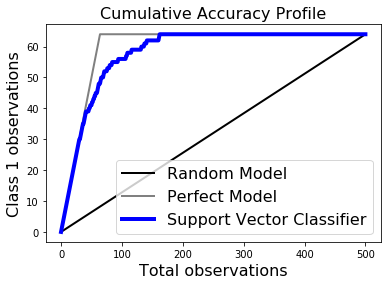

In [21]:
# Plot Random Model
plt.plot([0, total], [0, class_1_count], 
         c = 'black', linewidth = 2, label = 'Random Model', linestyle = '--')

# Plot Perfect Model
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model')

# Plot My Model
plt.plot(x_values, y_values, 
         c = 'b',  linewidth = 4, label = 'Support Vector Classifier')

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

In [22]:
def x_y_cap_data(model, x_test, y_test, total, classe = 1):
    probs = model_naive_bayes.predict_proba(x_test)
    probs = probs[:, 1]
    model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    return x_values, y_values    

def plot_cap(model, x_test, y_test, total, classe = 1, class_count, color = "b", label):
    x_value, y_value = x_y_cap_data(model, x_test, y_test, total, classe)
    return 
    # Plot Perfect Model
plt.plot([0, class_count, total], [0, class_count, class_1_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model')

In [23]:
x_y_cap_data(model_random_forest, x_test, y_test, total, 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

## Descrevendo o Gráfico CAP

X = O número de Observações:
Y = Classes 1 da base